<a href="https://colab.research.google.com/github/neerajthandayan/Deep_Learning/blob/main/Self-OrganizingMaps/SOMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing Maps

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Fetching data

!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

--2021-05-25 15:35:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28735 (28K) [application/x-httpd-php]
Saving to: ‘australian.dat.2’

australian.dat.2    100%[===================>]  28.06K  --.-KB/s    in 0.07s   

2021-05-25 15:35:58 (428 KB/s) - ‘australian.dat.2’ saved [28735/28735]



In [3]:
# Creating Data Frame

data = pd.DataFrame(np.genfromtxt('australian.dat'))
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0,1.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0,1.0


In [4]:
# Adding Customer ID Column

data['CustomerID'] = np.random.randint(1000, 9999,len(data))

In [5]:
# Creating X & Y values
X = data.drop(columns=[14]).values
Y = data[14].astype(int).values

In [6]:
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(X)

In [7]:
!pip install MiniSom

In [8]:
# Training The SOM

from minisom import MiniSom
som = MiniSom(10, 10, input_len = 15)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 100)

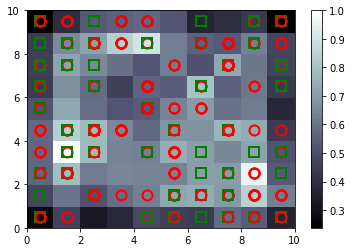

In [9]:
# Visaulising Results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for p,q in enumerate(X_scaled):
  w = som.winner(q)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[Y[p]],
       markeredgecolor = colors[Y[p]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2) 

In [23]:
# Fraud Detection

mappings = som.win_map(X_scaled)
fraud = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis= 0)
fraud = sc.inverse_transform(fraud)
pd.DataFrame(fraud).iloc[:,-1]

0     9362.0
1     6540.0
2     9793.0
3     7643.0
4     5124.0
5     6757.0
6     6960.0
7     7938.0
8     7302.0
9     7566.0
10    4727.0
11    5542.0
12    5552.0
13    5264.0
14    6470.0
15    5044.0
16    5638.0
17    6867.0
18    3112.0
19    1956.0
20    4818.0
21    9880.0
22    2322.0
23    9024.0
24    6433.0
25    2446.0
26    1388.0
27    4014.0
28    1396.0
29    2977.0
30    2040.0
31    1666.0
32    8360.0
33    3756.0
34    5155.0
35    1845.0
36    3416.0
37    1068.0
38    7150.0
39    7047.0
40    6444.0
41    6890.0
42    9687.0
43    2580.0
44    5936.0
Name: 14, dtype: float64